Fail to reject null hypothesis that data is normal for column Decision Tree (p=0.642964>=0.010000)
Fail to reject null hypothesis that data is normal for column KNN (p=0.319740>=0.010000)
Fail to reject null hypothesis that data is normal for column Random Forest (p=0.208342>=0.010000)
Fail to reject null hypothesis that data is normal for column Logistic Regression (p=0.669231>=0.010000)
Fail to reject null hypothesis that data is normal for column SVM (p=0.598918>=0.010000)
Using Bartlett's test for homoscedacity of normally distributed data
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.
                     meanrank      mean       std  ci_lower  ci_upper  \
Logistic Regression  4.033333  0.854

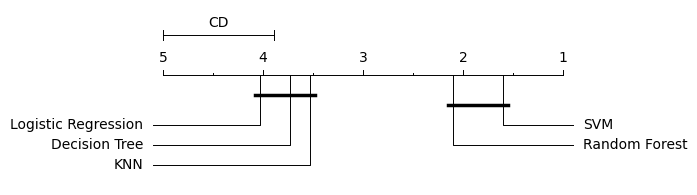

In [1]:
import pandas as pd
from autorank import autorank, create_report, plot_stats
from scores import (
    dt_f1_scores,
    knn_f1_scores,
    lg_f1_scores,
    rf_f1_scores,
    svm_f1_scores,
)

df = pd.DataFrame({
    "Decision Tree": dt_f1_scores,
    "KNN": knn_f1_scores,
    "Random Forest": rf_f1_scores,
    "Logistic Regression": lg_f1_scores,
    "SVM": svm_f1_scores,
})

result = autorank(df, alpha=0.05, verbose=True)
plot_stats(result)
print(create_report(result))

In [2]:
tab = result.rankdf

tab = tab.rename(columns={
    "mean": "Mean F1",
    "std": "Std Dev",
    "meanrank": "Mean Rank",
    "effect_size": "Effect Size",
    "magnitude": "Magnitude"
})

tab = tab[["Mean F1", "Std Dev", "Mean Rank", "Effect Size", "Magnitude"]]

# Ordene pelo ranking (menor é melhor)
tab = tab.sort_values("Mean Rank")

tab


,Mean F1,Std Dev,Mean Rank,Effect Size,Magnitude
SVM,0.883028,0.006785,1.600000,-3.976079,large
Random Forest,0.884134,0.053668,2.100000,-0.768304,medium
KNN,0.858501,0.008889,3.533333,-0.463679,small
Decision Tree,0.855134,0.009616,3.733333,-0.050696,negligible
Logistic Regression,0.854698,0.007450,4.033333,0.0,negligible
